## Assessment: Gabriel Reynolds

Notebook for Bastion Trading take home assessment, time-series analysis section.

First steps:
- Load the CSV and verify data is correct
- calculate and visualize the Pearson correlation matrix for numeric columns
- List the most correlated feature pairs (by |corr|) to flag near-duplicates

Why
- Highly correlated inputs make linear-model coefficients jumpy and hard to interpret
- Early pruning/regularization keeps models simpler and usually generalizes better
- Can potentially identify relationships before any modelling

No data cleaning was needed because of the nature of the csv provided by Bastion

In [3]:
# load
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 60)

csv = "TEST_Trader_Quant_dataset.csv"
df = pd.read_csv(csv)

print(f"rows, cols = {df.shape}")
cols = list(df.columns)
print("cols[0:10]:", cols[:10], ("..." if len(cols) > 10 else ""))

display(df.head(5))

rows, cols = (8688, 56)
cols[0:10]: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'] ...


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56
0,74.23525,124.000,23.000,149.187,7.459,7.872,257.347,77.510,86.753,0,3.94307,123.000,655.000,7.234,8.504,1.253,4.271,0.609,43.883,0.437677,0.00,0.00,223.12,87.06,25.37,216.93,904.57,96.88,2.188383,2.19075,32.0,4443234.0,3208895.8,1533511.6,1405822.0,5316877.3,1933595.4,1014822.8,56.39,234,544,68666,29961,20993,56618,22913,15582,6.8649,44,533,201481,85873,42474,237989,69445,33461
1,74.17525,33.105,280.280,133.749,0.709,31.305,87.454,51.044,130.774,2,3.94129,1.441,51.152,7.788,1.760,6.395,16.373,12.321,68.778,0.318916,151.17,311.18,179.52,115.23,118.88,237.69,65.48,805.45,1.594578,2.18975,56243.0,209798.8,2494573.2,1822260.6,1372616.1,6118601.3,924577.4,1051055.3,56.39,10014,6591,64082,36002,21560,50693,20197,13398,6.8589,45012,63355,230732,84898,45959,155027,45111,44533
2,74.18325,375.086,323.644,170.037,3.999,25.476,168.794,72.876,270.396,2,3.94109,1.905,11.772,8.995,4.740,10.691,4.660,0.544,6.678,0.252456,361.97,42.35,304.59,92.94,47.01,352.14,163.57,145.25,1.262278,2.19075,114263.6,22740.7,3425565.5,1470097.7,1386080.4,5282302.4,1800512.5,954954.1,56.39,195,1069,65066,38917,23052,54047,22575,12777,6.8595,27710,55091,247450,98765,43705,206995,74398,42840
3,74.17625,48.775,25.853,93.927,39.872,14.148,72.699,65.654,352.091,0,3.94113,6.304,8.877,10.731,3.781,5.531,5.907,3.991,12.612,0.651575,199.57,451.91,144.22,120.61,26.67,397.62,258.68,106.99,3.257873,2.19075,3411.9,1960.1,3431277.8,1234518.2,1169311.0,4957235.9,1766596.4,962826.8,56.39,776,1323,59919,39903,25183,53596,21869,14498,6.8595,32364,39759,237211,95343,35553,217658,75365,53509
4,74.17125,48.774,301.886,90.637,30.003,20.829,201.224,24.241,96.640,0,3.94099,1.492,4.086,17.317,5.488,7.617,2.186,0.408,11.845,0.277754,128.12,29.35,149.51,113.91,31.24,448.44,198.88,77.14,1.388771,2.19075,2327.0,4471.1,3303599.7,1159038.0,1422675.0,5053636.6,1755126.7,973405.1,56.45,6121,2017,59473,34400,14307,53205,24300,14704,6.8583,17667,52192,236698,102647,44195,196868,74185,19152


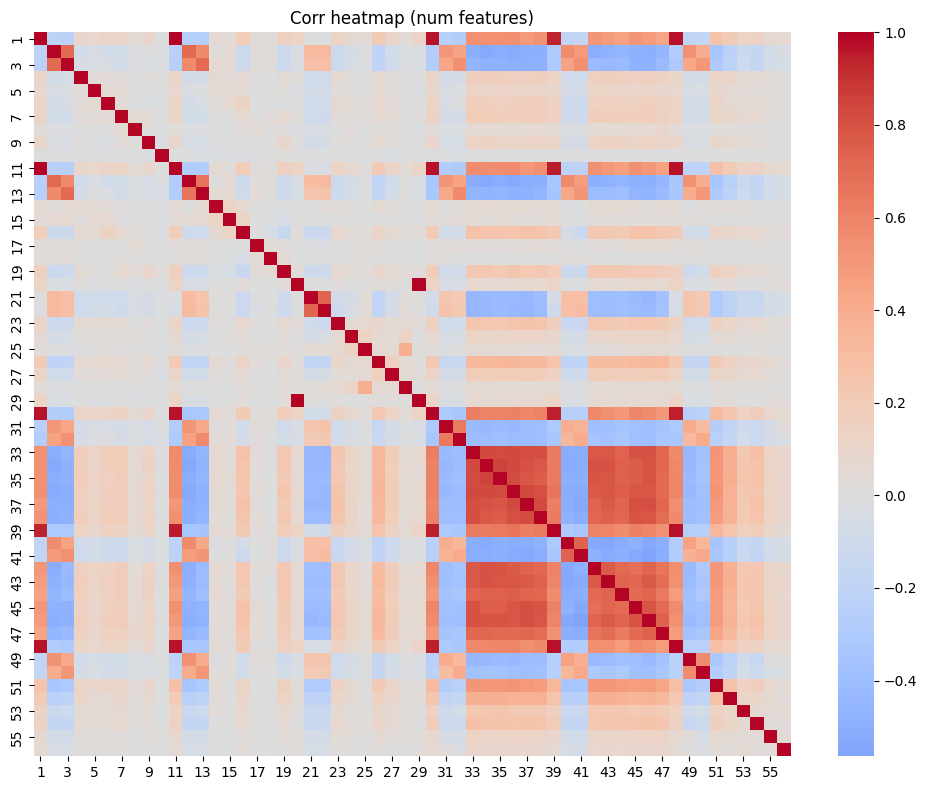

In [4]:
import numpy as np, matplotlib.pyplot as plt, seaborn as sns

num = df.select_dtypes(include=[np.number])
C = num.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(C, cmap="coolwarm", center=0)
plt.title("Corr heatmap (num features)")
plt.tight_layout()

### Most similar feature pairs
I'd like to pick out the pairs that are most correlated so we can do some pruning/relationship indentification. We take the upper triangle of the correlation matrix, stack it into a long form, sort by absolute correlation, and show the top-10

In [5]:
import pandas as pd, numpy as np

num = df.select_dtypes(include=[np.number])
C = num.corr(numeric_only=True)

s = (C.where(np.triu(np.ones(C.shape), k=1).astype(bool))
       .stack()
       .rename("corr")
       .abs()
       .sort_values(ascending=False))

k = 10
out = s.head(k).to_frame().rename_axis(["a","b"])
display(out)

corr
a  b           
20 29  1.000000
1  11  0.995385
11 30  0.975031
   48  0.973088
39 48  0.971967
1  30  0.968214
   48  0.966122
11 39  0.951786
30 48  0.949627
   39  0.946272

### Drop highly correlated features

In [6]:
import pandas as pd, numpy as np

num = df.select_dtypes(include=[np.number])
C = num.corr(numeric_only=True).abs()
upper = C.where(np.triu(np.ones(C.shape), k=1).astype(bool))
thr = 0.95
Drop = [c for c in upper.columns if (upper[c] > thr).any()]

df = df.drop(columns=Drop)
print(f"dropped {len(Drop)} cols:", Drop[:10], ("..." if len(Drop) > 10 else ""))
print("new shape:", df.shape)

display(df.head(5))

dropped 5 cols: ['11', '29', '30', '39', '48'] 
new shape: (8688, 51)


,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34,35,36,37,38,40,41,42,43,44,45,46,47,49,50,51,52,53,54,55,56
0,74.23525,124.000,23.000,149.187,7.459,7.872,257.347,77.510,86.753,0,123.000,655.000,7.234,8.504,1.253,4.271,0.609,43.883,0.437677,0.00,0.00,223.12,87.06,25.37,216.93,904.57,96.88,32.0,4443234.0,3208895.8,1533511.6,1405822.0,5316877.3,1933595.4,1014822.8,234,544,68666,29961,20993,56618,22913,15582,44,533,201481,85873,42474,237989,69445,33461
1,74.17525,33.105,280.280,133.749,0.709,31.305,87.454,51.044,130.774,2,1.441,51.152,7.788,1.760,6.395,16.373,12.321,68.778,0.318916,151.17,311.18,179.52,115.23,118.88,237.69,65.48,805.45,56243.0,209798.8,2494573.2,1822260.6,1372616.1,6118601.3,924577.4,1051055.3,10014,6591,64082,36002,21560,50693,20197,13398,45012,63355,230732,84898,45959,155027,45111,44533
2,74.18325,375.086,323.644,170.037,3.999,25.476,168.794,72.876,270.396,2,1.905,11.772,8.995,4.740,10.691,4.660,0.544,6.678,0.252456,361.97,42.35,304.59,92.94,47.01,352.14,163.57,145.25,114263.6,22740.7,3425565.5,1470097.7,1386080.4,5282302.4,1800512.5,954954.1,195,1069,65066,38917,23052,54047,22575,12777,27710,55091,247450,98765,43705,206995,74398,42840
3,74.17625,48.775,25.853,93.927,39.872,14.148,72.699,65.654,352.091,0,6.304,8.877,10.731,3.781,5.531,5.907,3.991,12.612,0.651575,199.57,451.91,144.22,120.61,26.67,397.62,258.68,106.99,3411.9,1960.1,3431277.8,1234518.2,1169311.0,4957235.9,1766596.4,962826.8,776,1323,59919,39903,25183,53596,21869,14498,32364,39759,237211,95343,35553,217658,75365,53509
4,74.17125,48.774,301.886,90.637,30.003,20.829,201.224,24.241,96.640,0,1.492,4.086,17.317,5.488,7.617,2.186,0.408,11.845,0.277754,128.12,29.35,149.51,113.91,31.24,448.44,198.88,77.14,2327.0,4471.1,3303599.7,1159038.0,1422675.0,5053636.6,1755126.7,973405.1,6121,2017,59473,34400,14307,53205,24300,14704,17667,52192,236698,102647,44195,196868,74185,19152


### Simple linear regressions between features
Now that the potentially problematic pairs have been pruned, makes sense to run simple linear regressions between each pair and see if there are any fun relationships.

In [7]:
import numpy as np, pandas as pd

n = df.select_dtypes(include=[np.number])
C = n.corr(numeric_only=True)

s = (C.where(np.triu(np.ones(C.shape), k=1).astype(bool))
       .stack()
       .rename("corr")
       .sort_values(key=lambda x: x.abs(), ascending=False))

k = 12
rows = []
for (a,b), r in s.head(k).items():
    x, y = n[a].values, n[b].values
    m, c = np.polyfit(x, y, 1)
    yhat = m*x + c
    r2 = float(np.corrcoef(x, y)[0,1]**2)
    rmse = float(np.sqrt(np.mean((y - yhat)**2)))
    rows.append({"a": a, "b": b, "slope": m, "intercept": c, "r": r, "r2": r2, "rmse": rmse})

reg = pd.DataFrame(rows).sort_values("r2", ascending=False)
display(reg.head(10))

,a,b,slope,intercept,r,r2,rmse
0,34,35,0.669257,74036.458764,0.848975,0.720759,248054.517370
1,33,34,0.467194,72427.816378,0.831626,0.691602,330685.833973
2,34,36,1.873413,488926.195080,0.830095,0.689058,749385.589578
3,36,37,0.384570,122364.028349,0.826964,0.683870,351388.198208
4,33,36,1.046694,246349.037397,0.825552,0.681536,758395.701362
5,35,36,2.355491,642171.465903,0.822760,0.676934,763854.878878
6,37,38,0.561698,122152.536887,0.822353,0.676265,242881.142865
7,33,35,0.362154,13338.657021,0.817760,0.668731,270176.670265
8,33,37,0.481472,42924.302309,0.816596,0.666828,360734.902505
9,37,46,0.014259,2617.105512,0.815610,0.665220,6321.997165


### Plot strongest pair
Quick scatter + fitted line for the top R^2 pair.

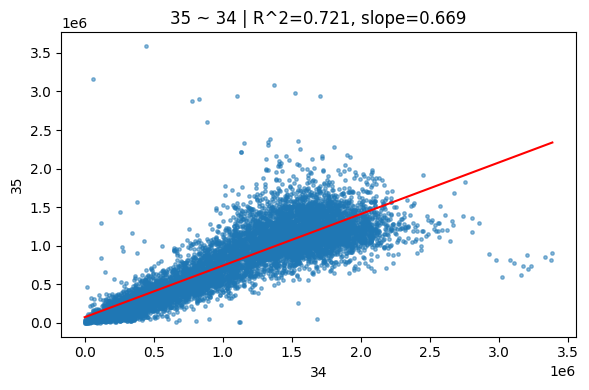

In [8]:
import matplotlib.pyplot as plt, numpy as np

# take the top row by R^2
row = reg.sort_values("r2", ascending=False).iloc[0]
a, b, m, c = row["a"], row["b"], row["slope"], row["intercept"]

x = df[a].values
y = df[b].values
xx = np.linspace(x.min(), x.max(), 200)
yy = m*xx + c

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=6, alpha=0.5)
plt.plot(xx, yy, color="red")
plt.title(f"{b} ~ {a} | R^2={row['r2']:.3f}, slope={m:.3f}")
plt.xlabel(a); plt.ylabel(b); plt.tight_layout()

### Polynomial regressions (deg 2/3)
This doesn't really give us anything useful - the graph shows that even between the "best" pair of features, although there is clearly some relationship between them, the linear regression is not capturing it effectively. Seems logical to try and capture some light nonlinearity by fitting y~x with quadratic and cubic polynomials. We compare R^2 vs the linear fit and surface pairs where higher degree helps.

In [9]:
import numpy as np, pandas as pd

n = df.select_dtypes(include=[np.number])
C = n.corr(numeric_only=True)

s = (C.where(np.triu(np.ones(C.shape), k=1).astype(bool))
       .stack()
       .rename("corr")
       .sort_values(key=lambda x: x.abs(), ascending=False))

k = 15
rows = []
for (a,b), r in s.head(k).items():
    x, y = n[a].values, n[b].values
    stats = {}
    for d in (1,2,3):
        p = np.polyfit(x, y, d)
        yhat = np.polyval(p, x)
        sst = ((y - y.mean())**2).sum()
        sse = ((y - yhat)**2).sum()
        r2 = 0.0 if sst == 0 else float(1 - sse/sst)
        stats[d] = {"r2": r2, "coef": p}
    r2_lin = stats[1]["r2"]
    r2_quad = stats[2]["r2"]
    r2_cub = stats[3]["r2"]
    best_d = max((1,2,3), key=lambda d: stats[d]["r2"])
    rows.append({
        "a": a, "b": b, "r": float(r),
        "r2_lin": r2_lin, "r2_quad": r2_quad, "r2_cub": r2_cub,
        "best_deg": int(best_d), "best_r2": float(stats[best_d]["r2"]),
        "delta": float(stats[best_d]["r2"] - r2_lin)
    })

poly_tbl = pd.DataFrame(rows).sort_values(["delta","best_r2"], ascending=False)
display(poly_tbl.head(10))

,a,b,r,r2_lin,r2_quad,r2_cub,best_deg,best_r2,delta
5,35,36,0.822760,0.676934,0.750804,0.751623,3,0.751623,0.074689
8,33,37,0.816596,0.666828,0.706853,0.736900,3,0.736900,0.070071
14,34,37,0.798673,0.637879,0.702973,0.706624,3,0.706624,0.068745
12,36,38,0.805914,0.649498,0.708933,0.715334,3,0.715334,0.065837
7,33,35,0.817760,0.668731,0.710202,0.732252,3,0.732252,0.063521
4,33,36,0.825552,0.681536,0.720334,0.740601,3,0.740601,0.059065
1,33,34,0.831626,0.691602,0.734994,0.750203,3,0.750203,0.058601
2,34,36,0.830095,0.689058,0.740653,0.746284,3,0.746284,0.057227
11,37,45,0.806319,0.650150,0.703085,0.705786,3,0.705786,0.055637
9,37,46,0.815610,0.665220,0.712911,0.719637,3,0.719637,0.054417


### Plot best nonlinear gain pair
Scatter + linear/quadratic/cubic fits for the pair with the largest R² gain over linear.

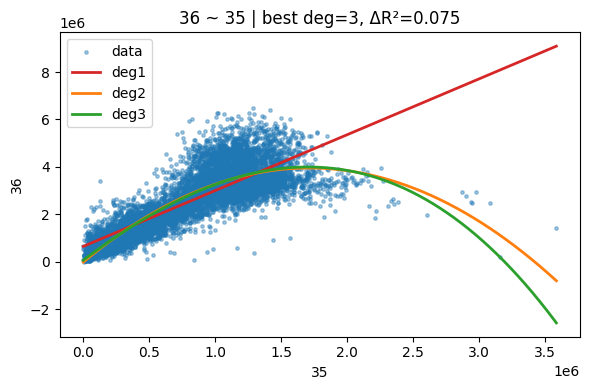

In [10]:
import numpy as np, matplotlib.pyplot as plt

row = poly_tbl.sort_values(["delta","best_r2"], ascending=False).iloc[0]
a, b = row["a"], row["b"]

x = df[a].values
y = df[b].values
xx = np.linspace(x.min(), x.max(), 400)

p1 = np.polyfit(x, y, 1)
p2 = np.polyfit(x, y, 2)
p3 = np.polyfit(x, y, 3)

plt.figure(figsize=(6,4))
plt.scatter(x, y, s=6, alpha=0.4, label="data")
plt.plot(xx, np.polyval(p1, xx), c="tab:red", lw=2, label="deg1")
plt.plot(xx, np.polyval(p2, xx), c="tab:orange", lw=2, label="deg2")
plt.plot(xx, np.polyval(p3, xx), c="tab:green", lw=2, label="deg3")
plt.title(f"{b} ~ {a} | best deg={int(row['best_deg'])}, ΔR²={row['delta']:.3f}")
plt.xlabel(a); plt.ylabel(b); plt.legend(); plt.tight_layout()

### Train/test sweep for nonlinear fits
Still not really picking up any strong relationships. I'm now considering whether any of these features have relationships over sections of the data (we're dealing with time-series so who can say what real world events may affect pairs of these features for portions of time), even if these relationships devolve later on to give the pair an overall "uncorrelated" considertaion. We try deg=1/2/3 across several train ratios and seeds,then store test R² and coefficients to see how performance and parameters move as the split changes.

In [11]:
import numpy as np, pandas as pd

n = df.select_dtypes(include=[np.number])
N = n.shape[0]

# pick pairs: favor ones with nonlinear gain if available
try:
    pairs_df = poly_tbl.sort_values(["delta","best_r2"], ascending=False).head(6)
    pairs = [(row.a, row.b) for _, row in pairs_df.iterrows()]
except Exception:
    C = n.corr(numeric_only=True)
    s = (C.where(np.triu(np.ones(C.shape), k=1).astype(bool)).stack().rename("corr").sort_values(key=lambda x: x.abs(), ascending=False))
    pairs = [ab for ab,_ in zip(s.index, range(6))]

ratios = [0.2,0.3,0.4,0.5,0.6,0.7,0.8]
seeds = [0,1,2]
degs = [1,2,3]

rows = []
for a,b in pairs:
    x = n[a].values.astype(float)
    y = n[b].values.astype(float)
    for r in ratios:
        split = int(r*N)
        for seed in seeds:
            idx = np.arange(N)
            rng = np.random.default_rng(seed)
            rng.shuffle(idx)
            tr = np.sort(idx[:split])
            te = np.sort(idx[split:])
            # standardize using train stats
            mx, sx = x[tr].mean(), x[tr].std() or 1.0
            my, sy = y[tr].mean(), y[tr].std() or 1.0
            zx_tr, zy_tr = (x[tr]-mx)/sx, (y[tr]-my)/sy
            zx_te, zy_te = (x[te]-mx)/sx, (y[te]-my)/sy
            for d in degs:
                p = np.polyfit(zx_tr, zy_tr, d)
                yh = np.polyval(p, zx_te)
                sst = ((zy_te - zy_te.mean())**2).sum()
                sse = ((zy_te - yh)**2).sum()
                r2 = 0.0 if sst==0 else float(1 - sse/sst)
                # pad coefs to len 4
                coef = list(p[::-1])  # ascending order for readability
                while len(coef) < 4: coef.append(np.nan)
                rows.append({
                    'a': a, 'b': b, 'ratio': r, 'seed': seed, 'deg': d,
                    'r2': r2, 'c0': coef[0], 'c1': coef[1], 'c2': coef[2], 'c3': coef[3]
                })

sweep = pd.DataFrame(rows)

# summary for plots
r2_sum = (sweep.groupby(['a','b','deg','ratio'])['r2']
               .mean().reset_index().rename(columns={'r2':'r2_mean'}))

gain_tbl = (r2_sum.pivot_table(index=['a','b','ratio'], columns='deg', values='r2_mean')
                 .rename(columns={1:'d1',2:'d2',3:'d3'}))

gain_tbl['gain'] = gain_tbl['d3'] - gain_tbl['d1']
nonlin_rank = (gain_tbl.groupby(['a','b'])['gain'].mean().sort_values(ascending=False))
best_pair = tuple(nonlin_rank.index[0]) if len(nonlin_rank)>0 else pairs[0]

print('pairs:', pairs)
print('best_pair (avg gain d3-d1):', best_pair)

display(r2_sum.head())

pairs: [('35', '36'), ('33', '37'), ('34', '37'), ('36', '38'), ('33', '35'), ('33', '36')]
best_pair (avg gain d3-d1): ('35', '36')


,a,b,deg,ratio,r2_mean
0,33,35,1,0.2,0.672824
1,33,35,1,0.3,0.669973
2,33,35,1,0.4,0.671957
3,33,35,1,0.5,0.675136
4,33,35,1,0.6,0.675810


### Visualize: R² vs train ratio (faceted)
Each panel shows one pair (target ~ predictor). We fit y~x with deg=1/2/3 polynomials on training data (sized by ratio on x-axis) and measure test R² (y-axis) on the held-out set. Lines represent mean across 3 random seeds. Higher curves = better generalization; deg=3 (green) often tops linear (red).

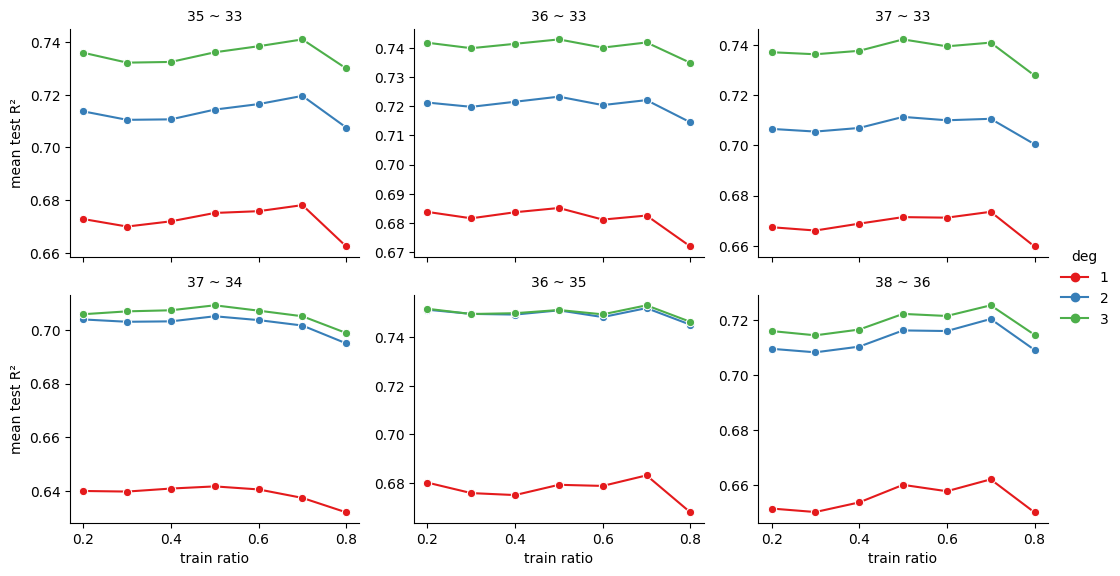

In [12]:
import seaborn as sns, matplotlib.pyplot as plt

# build a label for facets
r2_sum['_pair'] = r2_sum['b'].astype(str) + ' ~ ' + r2_sum['a'].astype(str)

g = sns.relplot(
    data=r2_sum, x='ratio', y='r2_mean', hue='deg', col='_pair',
    kind='line', palette='Set1', col_wrap=3, marker='o', facet_kws={'sharey': False},
    height=3, aspect=1.2
)
g.set_titles(col_template='{col_name}')
g.set_axis_labels('train ratio', 'mean test R²')
g.fig.subplots_adjust(bottom=0.12, left=0.08)
plt.show()

### Visualize: coefficient drift (best pair, deg=3)
For the pair with the largest nonlinear gain, we want to show how the fitted cubic coefficients (c0=intercept, c1=linear term, c2=quadratic, c3=cubic) change as we vary the train ratio (x-axis). Data was z-scored by train stats, so coefficients are on a standardized scale (y-axis). Flat lines = stable parameters; drift = sensitivity to train size.

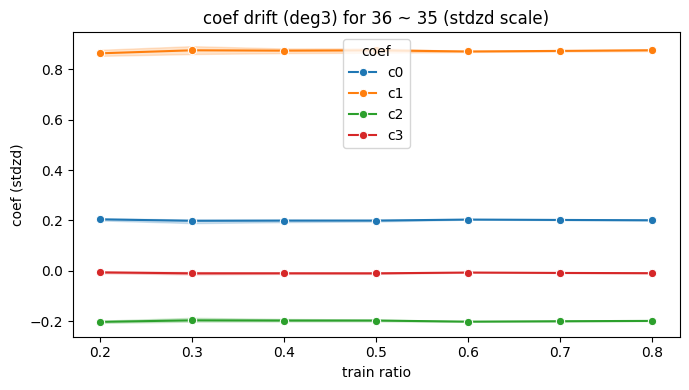

In [21]:
import seaborn as sns, matplotlib.pyplot as plt

bp = best_pair
sub = sweep[(sweep['a']==bp[0]) & (sweep['b']==bp[1]) & (sweep['deg']==3)].copy()
long = sub.melt(id_vars=['ratio','seed'], value_vars=['c0','c1','c2','c3'], var_name='coef', value_name='val')

plt.figure(figsize=(7,4))
sns.lineplot(data=long, x='ratio', y='val', hue='coef', estimator='mean', errorbar=('pi',50), marker='o')
plt.title(f'coef drift (deg3) for {bp[1]} ~ {bp[0]} (stdzd scale)')
plt.xlabel('train ratio'); plt.ylabel('coef (stdzd)'); plt.tight_layout()

### Variational Autoencoder (VAE) exploration
Linear and polynomial fits haven't captured strong relationships. Let's try a neural approach: VAEs can learn nonlinear manifolds and might surface latent structure. We'll pick a mix of highly correlated pairs and low-correlation pairs, then compare VAE reconstruction R² against our polynomial baselines across different architectures (latent dims, hidden sizes).

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader

class VAE(nn.Module):
    def __init__(self, input_dim=1, hidden=32, latent=2):
        super().__init__()
        self.enc1 = nn.Linear(input_dim, hidden)
        self.enc_mu = nn.Linear(hidden, latent)
        self.enc_logvar = nn.Linear(hidden, latent)
        self.dec1 = nn.Linear(latent, hidden)
        self.dec2 = nn.Linear(hidden, input_dim)
    
    def encode(self, x):
        h = F.relu(self.enc1(x))
        return self.enc_mu(h), self.enc_logvar(h)
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5*logvar)
        eps = torch.randn_like(std)
        return mu + eps*std
    
    def decode(self, z):
        h = F.relu(self.dec1(z))
        return self.dec2(h)
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        return self.decode(z), mu, logvar

def vae_loss(recon, x, mu, logvar):
    mse = F.mse_loss(recon, x, reduction='sum')
    kld = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return mse + kld

def train_vae(model, loader, epochs=100, lr=1e-3):
    opt = torch.optim.Adam(model.parameters(), lr=lr)
    model.train()
    for ep in range(epochs):
        for xb, yb in loader:
            opt.zero_grad()
            recon, mu, logvar = model(xb)
            loss = vae_loss(recon, yb, mu, logvar)
            loss.backward()
            opt.step()
    return model

print("VAE class defined")

VAE class defined


In [14]:
import numpy as np, pandas as pd

n = df.select_dtypes(include=[np.number])
C = n.corr(numeric_only=True)

# pick 3 high-corr pairs + 3 low-corr pairs
s_all = (C.where(np.triu(np.ones(C.shape), k=1).astype(bool))
          .stack().rename("corr").sort_values(key=lambda x: x.abs(), ascending=False))

high_pairs = [(a,b) for (a,b),_ in s_all.head(3).items()]
low_pairs = [(a,b) for (a,b),_ in s_all.tail(3).items()]
vae_pairs = high_pairs + low_pairs

# hyperparams to sweep
hidden_sizes = [16, 32, 64]
latent_dims = [2, 4, 8]
epochs = 150
batch_size = 128
train_ratio = 0.7

print(f"high corr pairs: {high_pairs}")
print(f"low corr pairs: {low_pairs}")
print(f"sweeping {len(hidden_sizes)} hidden × {len(latent_dims)} latent = {len(hidden_sizes)*len(latent_dims)} configs")

high corr pairs: [('34', '35'), ('33', '34'), ('34', '36')]
low corr pairs: [('10', '34'), ('18', '28'), ('6', '8')]
sweeping 3 hidden × 3 latent = 9 configs


In [15]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

N = n.shape[0]
split = int(train_ratio * N)

vae_results = []
for a, b in vae_pairs:
    x = n[a].values.astype(float)
    y = n[b].values.astype(float)
    
    # split data
    idx = np.arange(N)
    rng = np.random.default_rng(42)
    rng.shuffle(idx)
    tr = np.sort(idx[:split])
    te = np.sort(idx[split:])
    
    # standardize
    mx, sx = x[tr].mean(), x[tr].std() or 1.0
    my, sy = y[tr].mean(), y[tr].std() or 1.0
    zx_tr, zy_tr = (x[tr]-mx)/sx, (y[tr]-my)/sy
    zx_te, zy_te = (x[te]-mx)/sx, (y[te]-my)/sy
    
    # baseline: cubic polynomial
    p3 = np.polyfit(zx_tr, zy_tr, 3)
    yh_poly = np.polyval(p3, zx_te)
    sst = ((zy_te - zy_te.mean())**2).sum()
    sse_poly = ((zy_te - yh_poly)**2).sum()
    r2_poly = 0.0 if sst==0 else float(1 - sse_poly/sst)
    
    # prepare tensors
    X_tr = torch.tensor(zx_tr.reshape(-1,1), dtype=torch.float32)
    Y_tr = torch.tensor(zy_tr.reshape(-1,1), dtype=torch.float32)
    X_te = torch.tensor(zx_te.reshape(-1,1), dtype=torch.float32)
    Y_te = torch.tensor(zy_te.reshape(-1,1), dtype=torch.float32)
    
    ds_tr = TensorDataset(X_tr, Y_tr)
    dl_tr = DataLoader(ds_tr, batch_size=batch_size, shuffle=True)
    
    # sweep VAE configs
    for h in hidden_sizes:
        for lat in latent_dims:
            model = VAE(input_dim=1, hidden=h, latent=lat)
            model = train_vae(model, dl_tr, epochs=epochs, lr=1e-3)
            
            model.eval()
            with torch.no_grad():
                recon, _, _ = model(X_te)
                sse_vae = ((Y_te - recon)**2).sum().item()
                r2_vae = 0.0 if sst==0 else float(1 - sse_vae/sst)
            
            vae_results.append({
                'a': a, 'b': b, 'hidden': h, 'latent': lat,
                'r2_poly': r2_poly, 'r2_vae': r2_vae, 'gain': r2_vae - r2_poly
            })

vae_df = pd.DataFrame(vae_results)
print(f"trained {len(vae_df)} VAE configs")
display(vae_df.head(10))

/tmp/ipykernel_3841671/2307501180.py:27: RankWarning: Polyfit may be poorly conditioned
  p3 = np.polyfit(zx_tr, zy_tr, 3)


trained 54 VAE configs


,a,b,hidden,latent,r2_poly,r2_vae,gain
0,34,35,16,2,0.760993,0.360377,-0.400616
1,34,35,16,4,0.760993,0.338384,-0.422609
2,34,35,16,8,0.760993,0.332275,-0.428718
3,34,35,32,2,0.760993,0.372206,-0.388787
4,34,35,32,4,0.760993,0.319178,-0.441815
5,34,35,32,8,0.760993,0.347606,-0.413387
6,34,35,64,2,0.760993,0.358866,-0.402127
7,34,35,64,4,0.760993,0.353305,-0.407688
8,34,35,64,8,0.760993,0.366040,-0.394953
9,33,34,16,2,0.749869,0.362438,-0.387431


### Plot: VAE gain heatmap by hyperparameters
Would like to see whether the increased compute investment actually leads to better predictive modelling, so we take each pair and show how VAE R² gain (VAE - cubic baseline) varies with hidden size and latent dimension. Red = VAE wins, blue = polynomial baseline better.

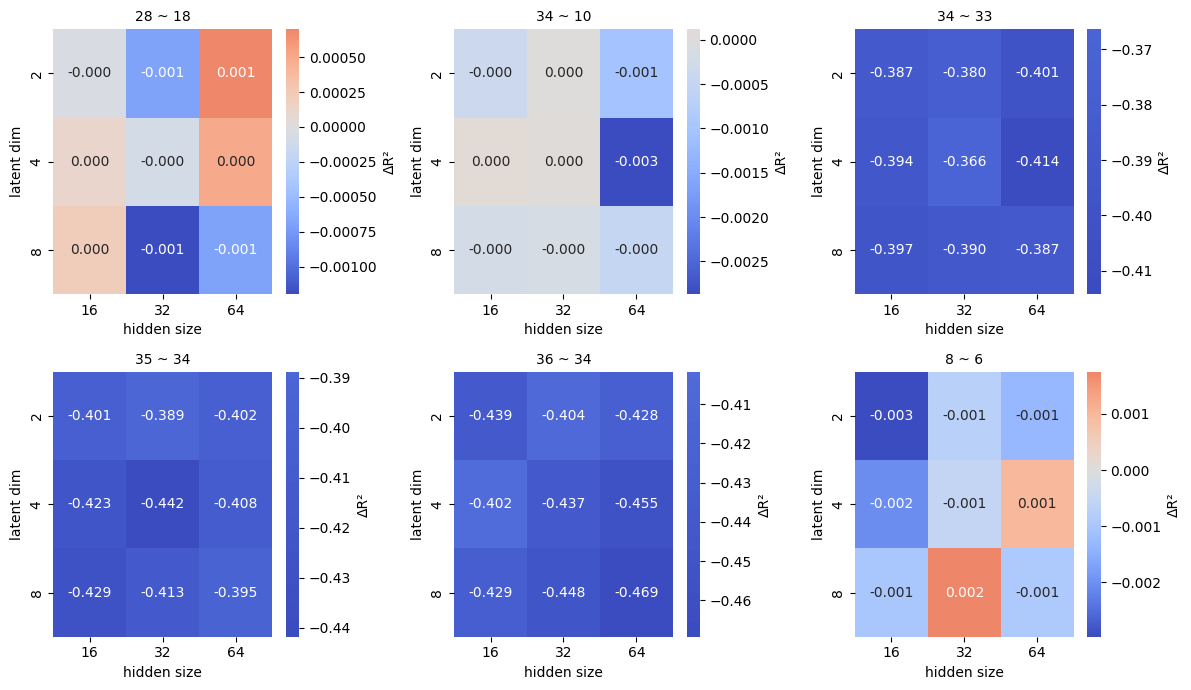

In [16]:
import matplotlib.pyplot as plt, seaborn as sns

vae_df['_pair'] = vae_df['b'].astype(str) + ' ~ ' + vae_df['a'].astype(str)

fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axes = axes.flatten()

for i, (pair, grp) in enumerate(vae_df.groupby('_pair')):
    if i >= 6: break
    pivot = grp.pivot(index='latent', columns='hidden', values='gain')
    sns.heatmap(pivot, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
                ax=axes[i], cbar_kws={'label': 'ΔR²'})
    axes[i].set_title(pair, fontsize=10)
    axes[i].set_xlabel('hidden size')
    axes[i].set_ylabel('latent dim')

plt.tight_layout()
plt.show()

### Plot: R² comparison across pairs
Compare polynomial baseline (deg=3) vs best VAE config for each pair. Shows which pairs benefit most from neural approach.

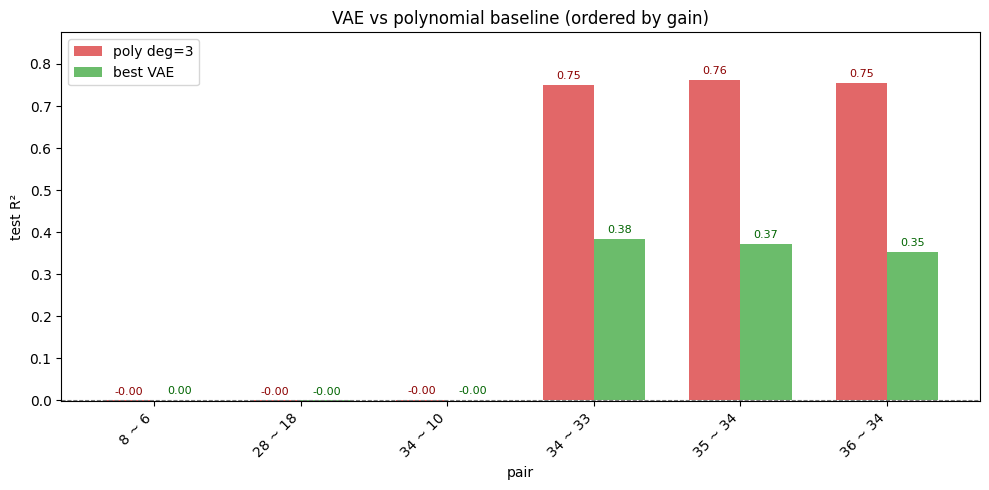

In [20]:
import matplotlib.pyplot as plt
import numpy as np

best_vae = vae_df.loc[vae_df.groupby('_pair')['r2_vae'].idxmax()]
best_vae = best_vae.sort_values('gain', ascending=False)

pairs_ordered = best_vae['_pair'].values
r2_poly_vals = best_vae['r2_poly'].values
r2_vae_vals = best_vae['r2_vae'].values

x = np.arange(len(pairs_ordered))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))
bars1 = ax.bar(x - width/2, r2_poly_vals, width, label='poly deg=3', color='tab:red', alpha=0.7)
bars2 = ax.bar(x + width/2, r2_vae_vals, width, label='best VAE', color='tab:green', alpha=0.7)

# add value labels on bars
for i, (b1, b2, pv, vv) in enumerate(zip(bars1, bars2, r2_poly_vals, r2_vae_vals)):
    ax.text(b1.get_x() + b1.get_width()/2, b1.get_height() + 0.01, f'{pv:.2f}', 
            ha='center', va='bottom', fontsize=8, color='darkred')
    ax.text(b2.get_x() + b2.get_width()/2, b2.get_height() + 0.01, f'{vv:.2f}', 
            ha='center', va='bottom', fontsize=8, color='darkgreen')

ax.set_xlabel('pair')
ax.set_ylabel('test R²')
ax.set_title('VAE vs polynomial baseline (ordered by gain)')
ax.set_xticks(x)
ax.set_xticklabels(pairs_ordered, rotation=45, ha='right')
ax.legend()
ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')
# ensure y-axis shows negative values if present
ymin = min(r2_poly_vals.min(), r2_vae_vals.min())
ymax = max(r2_poly_vals.max(), r2_vae_vals.max())
if ymin < 0:
    ax.set_ylim(ymin * 1.1, ymax * 1.15)
else:
    ax.set_ylim(0, ymax * 1.15)
plt.tight_layout()
plt.show()

Interesting, but I guess not exactly suprising. For our picked out "uncorrelated" pairs, even the VAE is not picking up anything, and for the more correlated ones we aren't outperforming the regression models. Performance of the VAE could likely be improved by scaling it up, but in this case I think that is pointless because of the quite clear relationship between features that shows up through regression. As for the ones not showing up, we might even be getting negative R^2 values from our predictive models, indicating a worse preformance than simply predicting the mean value. Need to check if this is the case

In [21]:
# show the actual R² values for each pair
print("Detailed R² values by pair:")
print(best_vae[['_pair', 'r2_poly', 'r2_vae', 'gain']].to_string(index=False))

Detailed R² values by pair:
  _pair   r2_poly    r2_vae      gain
  8 ~ 6 -0.001302  0.000449  0.001750
28 ~ 18 -0.002043 -0.001344  0.000699
34 ~ 10 -0.000181 -0.000061  0.000119
34 ~ 33  0.749869  0.383486 -0.366383
35 ~ 34  0.760993  0.372206 -0.388787
36 ~ 34  0.754014  0.352247 -0.401766


### Plot: reconstruction scatter for best VAE config
Visualize the best-performing VAE's predictions vs actual values on test set, compared to cubic polynomial fit. Shows whether VAE captures different structure than polynomial.

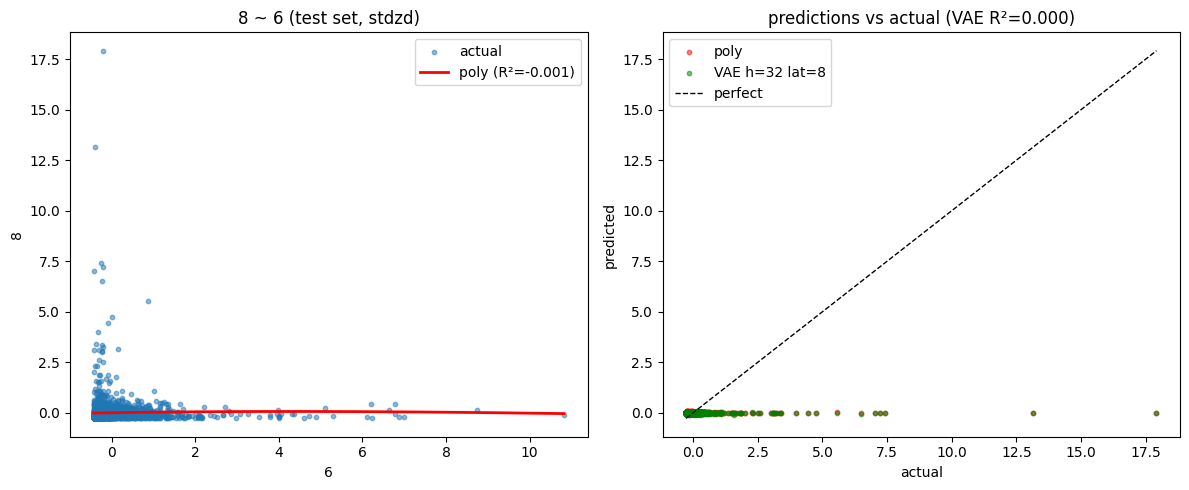

best config: 8 ~ 6, hidden=32, latent=8, gain=0.0018


In [18]:
import torch
import matplotlib.pyplot as plt

# pick the overall best VAE config by gain
best_row = vae_df.loc[vae_df['gain'].idxmax()]
a, b = best_row['a'], best_row['b']
h, lat = int(best_row['hidden']), int(best_row['latent'])

# rebuild data
x = n[a].values.astype(float)
y = n[b].values.astype(float)

N = len(x)
split = int(train_ratio * N)
idx = np.arange(N)
rng = np.random.default_rng(42)
rng.shuffle(idx)
tr = np.sort(idx[:split])
te = np.sort(idx[split:])

mx, sx = x[tr].mean(), x[tr].std() or 1.0
my, sy = y[tr].mean(), y[tr].std() or 1.0
zx_tr, zy_tr = (x[tr]-mx)/sx, (y[tr]-my)/sy
zx_te, zy_te = (x[te]-mx)/sx, (y[te]-my)/sy

# retrain best VAE
X_tr = torch.tensor(zx_tr.reshape(-1,1), dtype=torch.float32)
Y_tr = torch.tensor(zy_tr.reshape(-1,1), dtype=torch.float32)
X_te = torch.tensor(zx_te.reshape(-1,1), dtype=torch.float32)

ds_tr = TensorDataset(X_tr, Y_tr)
dl_tr = DataLoader(ds_tr, batch_size=batch_size, shuffle=True)

model = VAE(input_dim=1, hidden=h, latent=lat)
model = train_vae(model, dl_tr, epochs=epochs, lr=1e-3)

model.eval()
with torch.no_grad():
    recon, _, _ = model(X_te)
    y_vae = recon.numpy().flatten()

# polynomial baseline
p3 = np.polyfit(zx_tr, zy_tr, 3)
y_poly = np.polyval(p3, zx_te)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.scatter(zx_te, zy_te, s=10, alpha=0.5, label='actual')
xx = np.linspace(zx_te.min(), zx_te.max(), 300)
ax1.plot(xx, np.polyval(p3, xx), c='red', lw=2, label=f'poly (R²={best_row["r2_poly"]:.3f})')
ax1.set_xlabel(a); ax1.set_ylabel(b)
ax1.set_title(f'{b} ~ {a} (test set, stdzd)')
ax1.legend()

ax2.scatter(zy_te, y_poly, s=10, alpha=0.5, label='poly', c='red')
ax2.scatter(zy_te, y_vae, s=10, alpha=0.5, label=f'VAE h={h} lat={lat}', c='green')
ax2.plot([zy_te.min(), zy_te.max()], [zy_te.min(), zy_te.max()], 'k--', lw=1, label='perfect')
ax2.set_xlabel('actual'); ax2.set_ylabel('predicted')
ax2.set_title(f'predictions vs actual (VAE R²={best_row["r2_vae"]:.3f})')
ax2.legend()

plt.tight_layout()
plt.show()

print(f"best config: {b} ~ {a}, hidden={h}, latent={lat}, gain={best_row['gain']:.4f}")

Confirming findings from above; VAE is underwhelming in this exercise, shame.

## Conclusions

This analysis examined feature relationships in a time-series trading dataset through correlation analysis, polynomial regression, and neural network approaches. Key findings are summarized below.

### Key Findings & Commentary

- Most feature pairs are pretty weakly related, even after dropping the highly correlated ones. Linear and polynomial fits don't really get us much predictive power.


- Nonlinear models (polynomial, VAE) give a little improvement here and there, but nothing game-changing. The VAE especially doesn't seem to find any hidden structure that the simple models miss.


- When you split the data randomly, a lot of these relationships just don't generalize. Negative R² scores pop up, which means the models are sometimes worse than just guessing the mean.


- If you're looking for real predictive juice, pairwise feature analysis isn't the answer for this dataset. You'd probably have better luck with domain-specific features, lagged variables, or something that takes the time-series nature into account (like rolling windows or regime detection).


- In short: the classic stuff (correlation, regression) tells the story, and the fancy neural nets don't add much here.

In [ ]:
# Summary statistics for the analysis
import pandas as pd, numpy as np

n = df.select_dtypes(include=[np.number])
C = n.corr(numeric_only=True)
upper_tri = C.where(np.triu(np.ones(C.shape), k=1).astype(bool)).stack()

print("Dataset overview:")
print(f"  Original shape: (8688, 56)")
print(f"  Final shape after pruning: {df.shape}")
print(f"  Features removed: {56 - df.shape[1]} (|corr| > 0.95)")

print("\nCorrelation (post-pruning):")
print(f"  Max abs correlation: {upper_tri.abs().max():.4f}")
print(f"  Mean abs correlation: {upper_tri.abs().mean():.4f}")
print(f"  Median abs correlation: {upper_tri.abs().median():.4f}")

print("\nLinear regression (top 12 pairs):")
print(f"  Best R²: {reg.iloc[0]['r2']:.4f}")
print(f"  Mean R²: {reg.iloc[:10]['r2'].mean():.4f}")

print("\nPolynomial regression (top 15 pairs):")
print(f"  Pairs with degree-3 advantage: {(poly_tbl['best_deg'] == 3).sum()}")
print(f"  Max R² gain (deg3 vs deg1): {poly_tbl.iloc[0]['delta']:.4f}")
print(f"  Mean R² gain: {poly_tbl['delta'].mean():.4f}")

print("\nTrain/test sweep:")
print(f"  Feature pairs tested: {sweep[['a','b']].drop_duplicates().shape[0]}")
print(f"  Total configurations: {len(sweep)}")
print(f"  Mean test R² (deg=1): {sweep[sweep['deg']==1]['r2'].mean():.4f}")
print(f"  Mean test R² (deg=3): {sweep[sweep['deg']==3]['r2'].mean():.4f}")

print("\nVAE analysis:")
print(f"  Best polynomial baseline R²: {vae_df['r2_poly'].max():.4f}")
print(f"  Best VAE R²: {vae_df['r2_vae'].max():.4f}")
print(f"  Mean VAE gain: {vae_df['gain'].mean():.4f}")
print(f"  Pairs where VAE beats poly: {(vae_df['gain'] > 0).sum()} / {len(vae_df)}")

SUMMARY STATISTICS

1. DATASET OVERVIEW
   Original shape: (8688, 56)
   Final shape after pruning: (8688, 51)
   Features removed: 5 (|corr| > 0.95)

2. CORRELATION ANALYSIS (post-pruning)
   Max absolute correlation: 0.8490
   Mean absolute correlation: 0.1862
   Median absolute correlation: 0.0926

3. LINEAR REGRESSION (top 12 pairs)
   Best R²: 0.7208
   Mean R²: 0.6821
   Worst R² (top 12): 0.6501

4. POLYNOMIAL REGRESSION (top 15 pairs)
   Pairs with degree-3 advantage: 15
   Max R² gain (deg3 vs deg1): 0.0747
   Mean R² gain: 0.0577

5. TRAIN/TEST SWEEP ANALYSIS
   Feature pairs tested: 6
   Total configurations: 378
   Mean test R² (deg=1): 0.6655
   Mean test R² (deg=3): 0.7313

6. VAE ANALYSIS (9 configurations per pair)
   Best polynomial baseline R²: 0.7610
   Best VAE R²: 0.3835
   Mean VAE gain: -0.2063
   Pairs where VAE beats poly: 9 / 54

KEY FINDINGS

1. Weak pairwise relationships: Most feature pairs show low linear
   correlation even after aggressive pruning (|corr